In [ ]:
#install the dependencies
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [ ]:
#load the data
from google.colab import files
uploaded = files.upload()

Saving TATAMOTORS.csv to TATAMOTORS.csv


In [ ]:
#store the data into a data frame
df = pd.read_csv('TATAMOTORS.csv')
df.head(6)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-05-17,408.399994,425.649994,405.000000,424.149994,424.149994,24651585
1,2022-05-18,424.000000,427.350006,414.049988,415.149994,415.149994,20490516
2,2022-05-19,400.000000,406.799988,396.200012,398.649994,398.649994,17706724
3,2022-05-20,410.000000,421.399994,410.000000,418.000000,418.000000,23504236
4,2022-05-23,421.649994,431.149994,419.549988,421.450012,421.450012,16345308
5,2022-05-24,423.899994,427.500000,416.000000,425.750000,425.750000,14525617


In [ ]:
#get the number of trading days
df.shape

(249, 7)

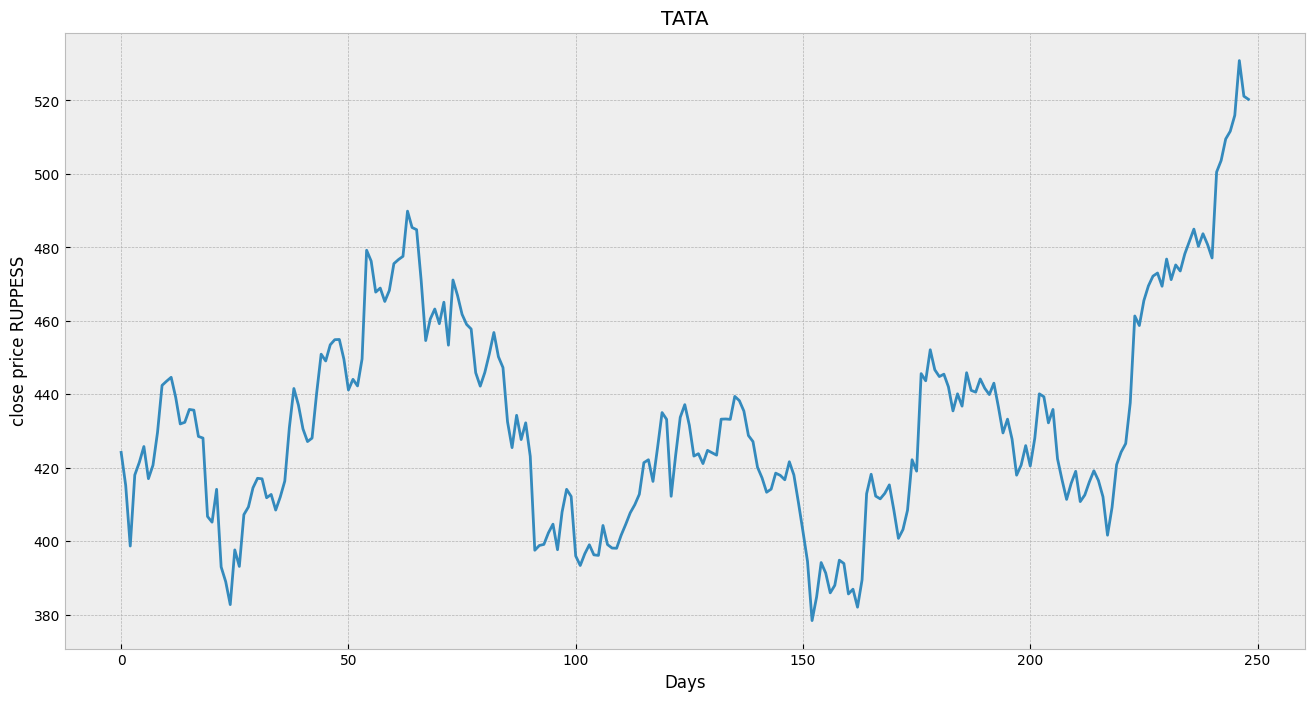

In [ ]:
#visualize the close price data
plt.figure(figsize=(16,8))
plt.title('TATA')
plt.xlabel('Days')
plt.ylabel('close price RUPPESS')
plt.plot(df['Close'])
plt.show()

In [ ]:
#get the close price
df = df[['Close']]
df.head(50)

,Close
0,424.149994
1,415.149994
2,398.649994
3,418.000000
4,421.450012
5,425.750000
6,417.000000
7,420.649994
8,429.600006
9,442.399994


In [ ]:
#create avaliable to predict 'x' days out into the future
future_days = 25
#create a new column (target) shifted 'x' units/days up
df['Prediction'] = df[['Close']].shift(-future_days)
df.tail(4)

,Close,Prediction
245,515.950012,NaN
246,530.849976,NaN
247,521.150024,NaN
248,520.299988,NaN


In [ ]:
#create the feature data set (x) and convert it to a numpy array and remove the last 'x' rows/days
x = np.array(df.drop(['Prediction'], 1))[:-future_days]
print(x)


[[424.149994]
 [415.149994]
 [398.649994]
 [418.      ]
 [421.450012]
 [425.75    ]
 [417.      ]
 [420.649994]
 [429.600006]
 [442.399994]
 [443.549988]
 [444.600006]
 [439.149994]
 [431.899994]
 [432.350006]
 [435.850006]
 [435.649994]
 [428.5     ]
 [428.049988]
 [406.700012]
 [405.149994]
 [414.100006]
 [392.950012]
 [388.950012]
 [382.700012]
 [397.600006]
 [393.100006]
 [407.200012]
 [409.299988]
 [414.5     ]
 [417.100006]
 [416.950012]
 [411.799988]
 [412.700012]
 [408.450012]
 [412.      ]
 [416.350006]
 [430.850006]
 [441.549988]
 [437.049988]
 [430.549988]
 [427.100006]
 [428.049988]
 [440.200012]
 [450.899994]
 [449.049988]
 [453.450012]
 [454.850006]
 [454.899994]
 [449.549988]
 [441.149994]
 [444.049988]
 [442.25    ]
 [449.600006]
 [479.200012]
 [476.25    ]
 [467.799988]
 [468.899994]
 [465.25    ]
 [468.25    ]
 [475.549988]
 [476.649994]
 [477.549988]
 [489.850006]
 [485.399994]
 [484.799988]
 [471.      ]
 [454.600006]
 [460.450012]
 [463.200012]
 [459.200012]
 [465.

<ipython-input-9-d6e72b9a1e2d>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = np.array(df.drop(['Prediction'], 1))[:-future_days]


In [ ]:
#create the target data set (y) and convert it to a numpy array and get all of the target values except the last 'x' rows/days
y = np.array(df['Prediction'])[:-future_days]
print(y)

[397.600006 393.100006 407.200012 409.299988 414.5      417.100006
 416.950012 411.799988 412.700012 408.450012 412.       416.350006
 430.850006 441.549988 437.049988 430.549988 427.100006 428.049988
 440.200012 450.899994 449.049988 453.450012 454.850006 454.899994
 449.549988 441.149994 444.049988 442.25     449.600006 479.200012
 476.25     467.799988 468.899994 465.25     468.25     475.549988
 476.649994 477.549988 489.850006 485.399994 484.799988 471.
 454.600006 460.450012 463.200012 459.200012 465.049988 453.350006
 471.100006 466.899994 461.75     459.       457.75     445.850006
 442.200012 445.899994 451.       456.799988 450.200012 447.25
 432.5      425.450012 434.25     427.649994 432.200012 423.100006
 397.5      398.799988 399.100006 402.25     404.600006 397.649994
 407.899994 414.100006 412.149994 395.950012 393.350006 396.549988
 399.       396.25     396.100006 404.25     399.049988 398.100006
 398.049988 401.600006 404.549988 407.700012 409.899994 412.75
 421.3500

In [ ]:
#split the data into 75% traning and 25% testing
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25)

In [ ]:
#create the models
#create the decision tree regressor model
tree = DecisionTreeRegressor().fit(x_train, y_train)
#create the linear regression model
lr = LinearRegression().fit(x_train, y_train)

In [ ]:
#Get the last 'lx' rows of the feature data set
x_future = df.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

<ipython-input-13-53d349c66b9c>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_future = df.drop(['Prediction'], 1)[:-future_days]


array([[426.      ],
       [420.450012],
       [428.      ],
       [440.100006],
       [439.299988],
       [432.200012],
       [435.850006],
       [422.399994],
       [416.649994],
       [411.350006],
       [415.700012],
       [419.      ],
       [410.75    ],
       [412.549988],
       [416.100006],
       [419.149994],
       [416.5     ],
       [412.049988],
       [401.600006],
       [409.200012],
       [420.799988],
       [424.25    ],
       [426.549988],
       [437.649994],
       [461.299988]])

In [ ]:
#show the model tree prediction
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()
#show the model linear regression prediction
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[458.700012 411.799988 447.400009 415.700012 385.600006 412.75
 476.799988 471.200012 475.200012 473.549988 478.200012 481.600006
 484.950012 480.25     483.700012 480.799988 477.100006 475.549988
 471.524994 428.75     411.799988 397.600006 530.849976 521.150024
 395.950012]

[433.43774893 434.3628123  433.10439204 431.08758184 431.2209276
 432.40434057 431.79596524 434.03779234 434.9961934  435.87958716
 435.15453492 434.60449805 435.97959523 435.67957603 435.08786454
 434.57949728 435.02119417 435.76291525 437.50470201 436.23794482
 434.30447885 433.72943621 433.34607779 431.49594604 427.55400179]


<ipython-input-15-d8365f840d17>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']=predictions


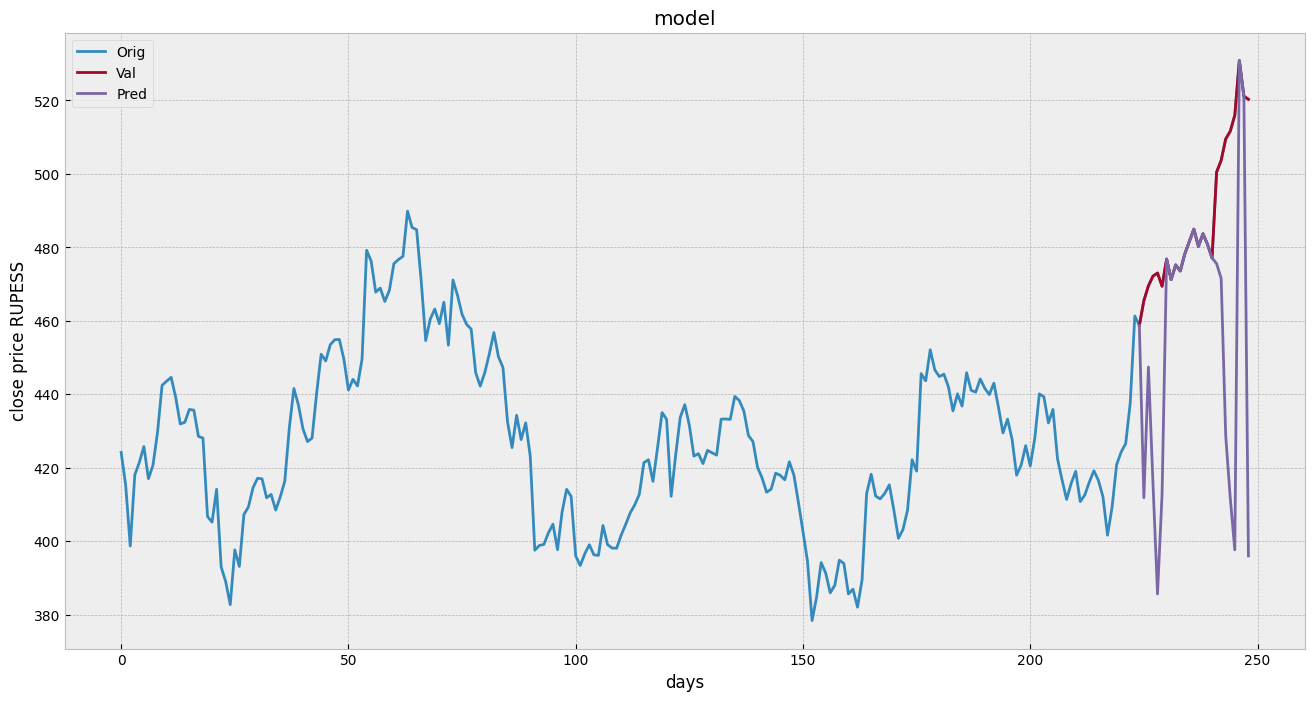

In [ ]:
#visualize the data
predictions = tree_prediction

valid = df[x.shape[0]:]
valid['Predictions']=predictions
plt.figure(figsize=(16,8))
plt.title('model')
plt.xlabel('days')
plt.ylabel('close price RUPESS')
plt.plot(df['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Orig','Val','Pred'])
plt.show()